You are running a jupyter notebook as a slideshow. 

Press **Space** to proceed. Press **Shift-space** to go back

In code cells you press **Shift-Enter** to evaluate your code.

You can always use smaller / larger fonts with keyboard shortcuts like **Alt +** and **Alt -** or similar (it could be Ctrl instead of Alt depending on the platform you are on). If the font is messed up, it helps to make it larger/smaller

If you want to leave the slideshow and return to the notebook, just press the **upper left X**

# Modelling spreading of infectious diseases
This is an experimental model. Inspirered by https://kagr.shinyapps.io/C19DK/ but for this example without age groups

The model is purely for testing the capabilities of ModelFlow, the parameters selected are for ilustration of the dynamic and are not actual estimates. 

This is a Jupyter Notebook running Python. 

The notebook is located on github here: https://github.com/IbHansen/Modelflow2

Feel free to use this notebook. The notebook should run when it is loaded. 

If you make changes **To run the notebook** find the menu line above and select **cell>run all** 

THE Notebook IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

The model is specified as equations. The equations defines the daily transition between the states:

 - susciptible
 - exposed
 - infectious
 - hospitalized 
 - In ICU 
 - recovered
 - dead 

The purpose of this notebook is to show the The large effect of small changes in behavior - as expressed with the parameter: 
probability_of_transmission. This parameter expresses the probability of transmission that COVID-19 is transmitted from one contact. 

The population is 1 mill persons at the start. 

First a baseline is run. 10 people are infected at day 30. The baseline assumptions causes a daily growth in 
infected of about 10 pct. 

Then a number of experiments are performed. In each experiment the probability of transmission is reduced from day 100. 

# Load Python libraries 

In [1]:
%matplotlib inline
from modelclass import  model
from modelnewton import newton_diff
from numpy import arange
from copy import deepcopy
model.modelflow_auto()

# Load the model and dataframe. 
If you want to study the model specification and the parameters in the baseline, the notebook dooing that is located 
[here](Corona%20specify%20model%20and%20make%20eksperiments.ipynb)

In [2]:
mcorona,df  = model.modelload('coronatest.json')  # Get the model and data

## Create a baseline scenario

We start out by creating new model instance for this experiment.
A baseline with no change on the probability of transmission is created. and then run a number of experiments which are keept in the model instance. 

But first the baseline. First the baseline is constructed and simulated. 

In [3]:
mcorona_new_policy= deepcopy(mcorona)  # make a model instance  for this experiment 

BASELINE_PROBABILITY_TRANSMISION = 0.04

experiment = f'''
EXO_EXPOSED                    = 1000      {30} {30}
RATE_CONTACT                   = 1
PROBABILITY_TRANSMISION        = {BASELINE_PROBABILITY_TRANSMISION}
'''

baseline = model.update_from_list(df,experiment)                                 # Update the baseline dataframe
mcorona_new_policy(baseline
                   ,keep = f'{BASELINE_PROBABILITY_TRANSMISION:.0%} (baseline)');  # Run the model on the updated dataframe

Update = [1000.0]
EXO_EXPOSED               Before                After                 Diff
30                       10.0000            1000.0000             990.0000
Update = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.

23                                    0.0500               0.0400              -0.0100
24                                    0.0500               0.0400              -0.0100
25                                    0.0500               0.0400              -0.0100
26                                    0.0500               0.0400              -0.0100
27                                    0.0500               0.0400              -0.0100
28                                    0.0500               0.0400              -0.0100
29                                    0.0500               0.0400              -0.0100
30                                    0.0500               0.0400              -0.0100
31                                    0.0500               0.0400              -0.0100
32                                    0.0500               0.0400              -0.0100
33                                    0.0500               0.0400              -0.0100
34                                    0.050

# Now some of the baseline results are shown 

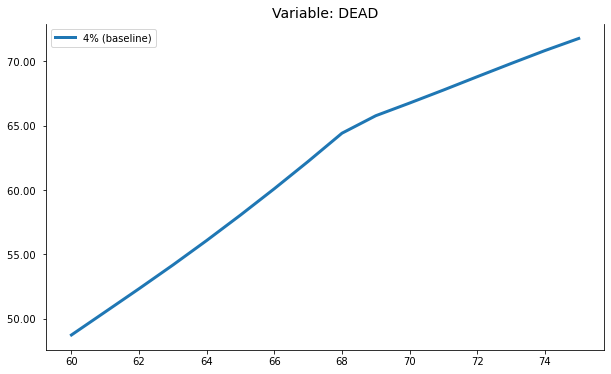

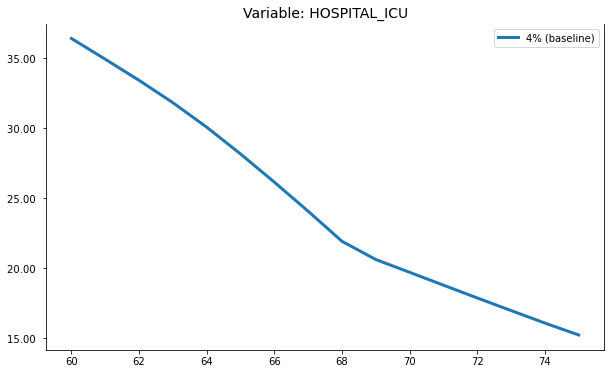

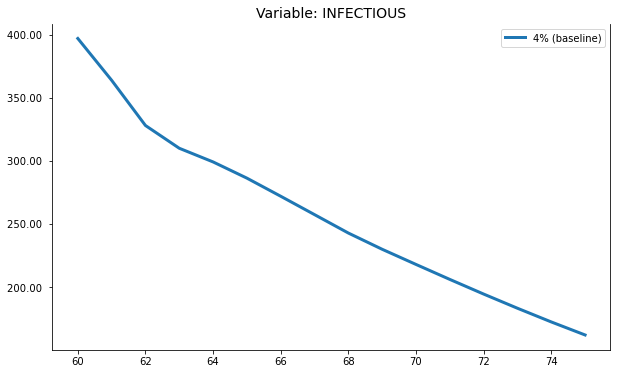

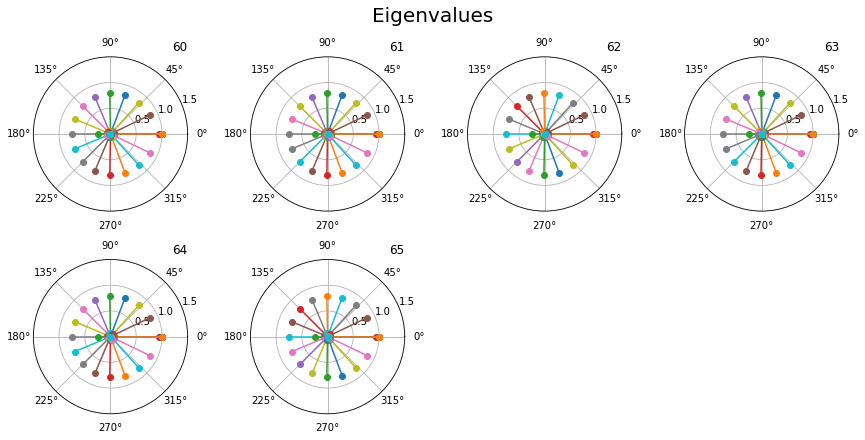

In [4]:
with mcorona_new_policy.set_smpl(60,75):
    figs = mcorona_new_policy.keep_plot('dead hospital_icu infectious',diff=0,legend=1,dec='2',
                                        showtype='level',scale='linear');
    mcorona_newton = newton_diff(mcorona_new_policy)      # create a newton_diff instance which contains derivatives 
    eig_dic = mcorona_newton.get_eigenvectors() #  
    mcorona_newton.eigplot_all(eig_dic);

    

In [5]:
mcorona_newton.get_feedback(eig_dic)

{60: -1.0,
 61: -1.0,
 62: -1.000000000001478,
 63: -1.0000000000019957,
 64: -1.0,
 65: -1.0,
 66: -1.0,
 67: -1.000000000002516,
 68: -1.000000000002836,
 69: -1.000000000000001,
 70: -1.000000000005487,
 71: -1.0000000000000022,
 72: -1.0,
 73: -1.0000000000000515,
 74: -1.000000000000001,
 75: -1.0000000000045444}

In [6]:
    mcorona_newton.eigplot_all({p :v for p,v in eig_dic.items() if p >290} ,maxfig=30);

ZeroDivisionError: integer division or modulo by zero

## Now,  behavior changes after day 100. 
We make a number of experiments with lower rate of transmission. 

In [ ]:
for PROBABILITY_TRANSMISION in arange(0.01,0.04,0.005):                # Loop over values for probability of transmission 
    experiment = f'PROBABILITY_TRANSMISION = {PROBABILITY_TRANSMISION} 100 499' # from day 100 and forward 
    experiment_dataframe = model.update_from_list(baseline,experiment)    # Update the baseline dataframe
    mcorona_new_policy(experiment_dataframe,keep = f'{PROBABILITY_TRANSMISION:.1%}' 
                      ,max_iterations=500);  # Run the model on the updated dataframe

## The results for all the experiments can be inspected. 
You can select the variables you want to look at, and change the way results are displayed

In [ ]:
mcorona_new_policy.keep_viz('dead hospital_icu infectious')

# The take: Small changes in behavior has a big impact on the developement of Covid-19 

You can try other experiments [here](Corona%20specify%20model%20and%20make%20eksperiments.ipynb)